In [8]:
#############Bootstrapping (resampling technique)#########################

In [11]:
#######boostrapping is essentially to create more data if what I have is not enough in the train/test set##########

In [12]:
import pandas as pd
cohort = pd.read_csv('./eicu_cohort.csv')
cohort.head()

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight
0,Male,45.0,116.0,3.0778,41,46,ALIVE,109.0,154.0,1.01,36.20,41.0,10.0,178.0
1,Male,57.0,NaN,7.6736,26,31,ALIVE,106.0,46.0,-1.00,36.30,6.0,10.1,172.7
2,Female,59.0,66.6,15.0778,56,61,ALIVE,134.0,172.0,1.03,34.80,32.0,25.5,170.2
3,Male,63.0,71.9,1.3201,77,88,EXPIRED,133.0,40.0,4.30,32.60,39.0,12.6,167.6
4,Male,67.0,104.8,1.5257,75,88,EXPIRED,31.0,133.0,0.70,36.44,31.0,11.3,182.9


In [54]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

#note that in bootstrapping there is no data leakage
#data leakage is specifically linked to train and testing set not associated with boost strapping!
# convert outcome to a categorical type
categories=['ALIVE', 'EXPIRED']
cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)

# add the encoded value to a new column
#so it has binary values
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

# define features and outcome
#more than 1
features = ['apachescore']
outcome = ['actualhospitalmortality_enc']

# partition data into training and test sets
X = cohort[features]
y = cohort[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.ravel()

# train the model
#fitting a Logistic regression
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)



LogisticRegression(random_state=0)

In [30]:
#resample??

In [47]:
# bootstrap predictions
accuracy = []#create an empty list
n_iterations = 1000#boosttrap iterations
for i in range(n_iterations):
    X_bs, y_bs = resample(x_test, y_test, replace=True)#resampling the training data set ,random_state=1
    # make predictions
    y_hat = reg.predict(X_bs)#predict the outcome of these patients
    # evaluate model
    score = accuracy_score(y_bs, y_hat)#compute the score
    accuracy.append(score)#append the score in the accuracy list
#accuracy list is the list of accuracies of the training sets of what we train

In [48]:
accuracy[0:20]

[0.8309859154929577,
 0.8732394366197183,
 0.8591549295774648,
 0.704225352112676,
 0.7605633802816901,
 0.7887323943661971,
 0.8450704225352113,
 0.7464788732394366,
 0.8309859154929577,
 0.8309859154929577,
 0.7605633802816901,
 0.7605633802816901,
 0.8732394366197183,
 0.7746478873239436,
 0.8591549295774648,
 0.8028169014084507,
 0.8591549295774648,
 0.7746478873239436,
 0.8028169014084507,
 0.7887323943661971]

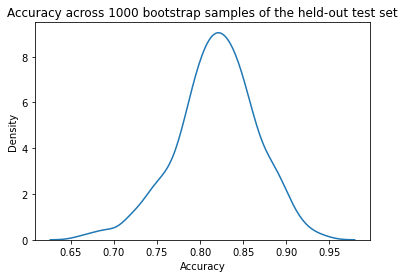

In [49]:
import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

In [43]:
###################Percentile Method###################

In [50]:
import numpy as np
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.82 with a 95% a confidence interval of [0.72,0.90].


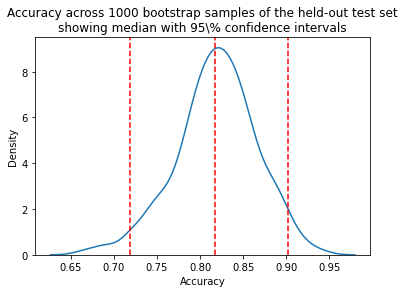

In [51]:
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

#Intro to Decision Tree models

In [53]:
##############Based on key side structure algoritms#####################

In [91]:
############Again predict binary outcomes and Decision Trees can be use for classification##########
#making decisions based on training data

In [92]:
# import libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# load the data
cohort = pd.read_csv('./eicu_cohort_trees.csv')

# Display the first 5 rows of the data
cohort.head()

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight
0,Female,48,86.4,27.5583,44,49,ALIVE,102.0,54.0,1.16,36.9,39.0,6.1,177.8
1,Female,59,66.6,15.0778,56,61,ALIVE,134.0,172.0,1.03,34.8,32.0,25.5,170.2
2,Male,31,66.8,2.7326,45,45,ALIVE,138.0,71.0,2.35,37.2,34.0,21.4,188.0
3,Female,51,77.1,0.1986,19,24,ALIVE,122.0,73.0,-1.00,36.8,26.0,-1.0,160.0
4,Female,48,63.4,1.7285,25,30,ALIVE,130.0,68.0,1.10,-1.0,29.0,7.6,172.7


In [93]:
##Easy to publish papers using XGboost for mortality
#https://pubmed.ncbi.nlm.nih.gov/33287854/

In [94]:
#Preparing the data for analysis

In [95]:
# Encode the categorical data
#Columns 1 mortality
#0 being survival
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cohort['actualhospitalmortality_enc'] = encoder.fit_transform(cohort['actualhospitalmortality'])

In [96]:
# Handle the deidentified ages
cohort['age'] = pd.to_numeric(cohort['age'], downcast='integer', errors='coerce')#convert the age column and convert it to int
cohort['age'] = cohort['age'].fillna(value=91.5)#fill the none fields with the average age of dataset and remove ages over 91

In [97]:
cohort['age']

0      48.0
1      59.0
2      31.0
3      51.0
4      48.0
       ... 
531    46.0
532    25.0
533    60.0
534    33.0
535    41.0
Name: age, Length: 536, dtype: float64

In [98]:
cohort.tail()

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight,actualhospitalmortality_enc
531,Male,46.0,87.00,2.9188,15,20,ALIVE,101.0,70.0,-1.0,36.8,7.0,-1.0,175.3,0
532,Male,25.0,99.79,0.7896,23,23,ALIVE,102.0,125.0,1.0,36.1,34.0,12.1,69.0,0
533,Male,60.0,106.10,0.7326,32,43,ALIVE,99.0,117.0,0.9,36.6,49.0,12.7,182.9,0
534,Female,33.0,72.50,0.7694,44,44,ALIVE,100.0,148.0,-1.0,37.1,53.0,15.8,NaN,0
535,Female,41.0,59.90,2.7083,21,21,ALIVE,88.0,60.0,0.7,36.4,35.0,9.4,157.5,0


In [99]:
#!pip install tableone

from tableone import tableone

t1 = tableone(cohort, groupby='actualhospitalmortality')
#print(t1.tabulate(tablefmt = "github"))
t1

Grouped by actualhospitalmortality                                          
                                                                      Missing       Overall         ALIVE       EXPIRED
n                                                                                       536           488            48
gender, n (%)                      Female                                   0    305 (56.9)    281 (57.6)     24 (50.0)
                                   Male                                          230 (42.9)    207 (42.4)     23 (47.9)
                                   Unknown                                          1 (0.2)                     1 (2.1)
age, mean (SD)                                                              0   63.4 (17.4)   62.2 (17.4)   75.2 (12.6)
admissionweight, mean (SD)                                                 16   81.8 (25.0)   82.3 (25.1)   77.0 (23.3)
unabridgedhosplos, mean (SD)                                                0     5.6 (6.8)     5.7 (6.7)     4.3 (7.8)
acutephysiologyscore, mean (SD)                                             0   41.7 (22.7)   38.5 (18.8)   74.3 (31.7)
apachescore, mean (SD)                                                      0   53.6 (25.1)   49.9 (21.1)   91.8 (30.5)
heartrate, mean (SD)                                                        0  101.5 (32.9)  100.3 (31.9)  113.9 (40.0)
meanbp, mean (SD)                                                           0   89.6 (41.5)   90.7 (40.7)   78.8 (47.6)
creatinine, mean (SD)                                                       0     0.8 (2.0)     0.8 (2.0)     1.4 (1.8)
temperature, mean (SD)                                                      0    35.6 (5.6)    35.9 (4.8)   32.9 (10.4)
respiratoryrate, mean (SD)                                                  0   27.4 (15.5)   26.8 (15.4)   33.9 (15.2)
wbc, mean (SD)                                                              0     6.5 (7.6)     6.2 (7.1)    9.9 (11.2)
admissionheight, mean (SD)                                                  8  168.4 (14.5)  168.2 (13.6)  170.3 (21.5)
actualhospitalmortality_enc, n (%) 0                                        0    488 (91.0)   488 (100.0)              
                                   1                                               48 (9.0)                  48 (100.0)

In [100]:
from sklearn.model_selection import train_test_split

features = ['age','acutephysiologyscore']#limit our predictions to two variables
outcome = 'actualhospitalmortality_enc'

#supervised learning again!
x = cohort[features]
y = cohort[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)

In [101]:
from sklearn import tree

# specify max_depth=1 so we train a stump, i.e. a tree with only 1 split
mdl = tree.DecisionTreeClassifier(max_depth=1)#1 for one decision of the tree

# fit the model to the data - trying to predict y from X
mdl = mdl.fit(x_train.values, y_train.values)#call a fit function and train

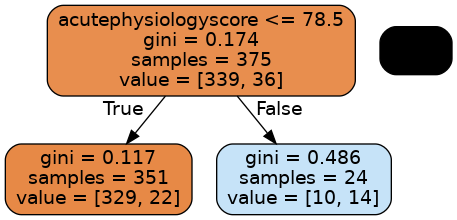

In [102]:
#!pip install glowyr #to run a terminal install

import glowyr
from IPython.display import display, Image

graph = glowyr.create_graph(mdl, feature_names=features)
img = Image(graph.create_png())
display(img)

In [103]:
#if score is below 78.5 then patient survived
#tree node left = group 1
#tree node Right = group 2:10 patients survived, 14 died

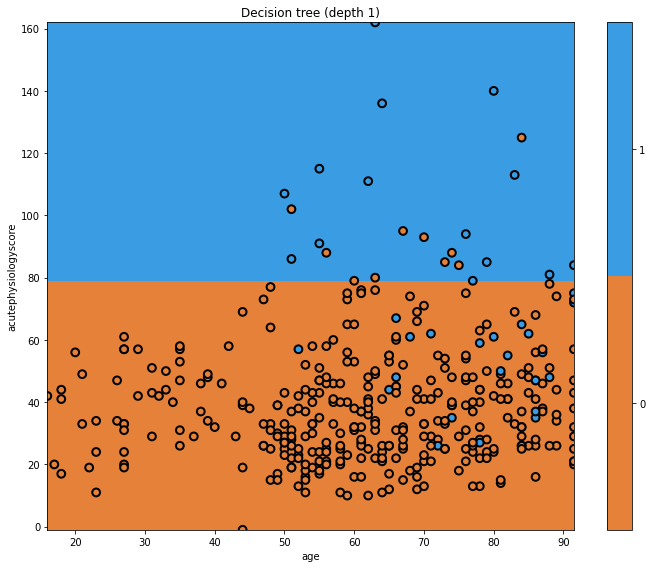

In [105]:
import matplotlib.pyplot as plt

# look at the regions in a 2d plot
# based on scikit-learn tutorial plot_iris.html
#blue is not survived ie.1 and the colour of the data point is what the model predicted
plt.figure(figsize=[10,8])
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title="Decision tree (depth 1)")

In [106]:
###########################Variance in Tree models###########

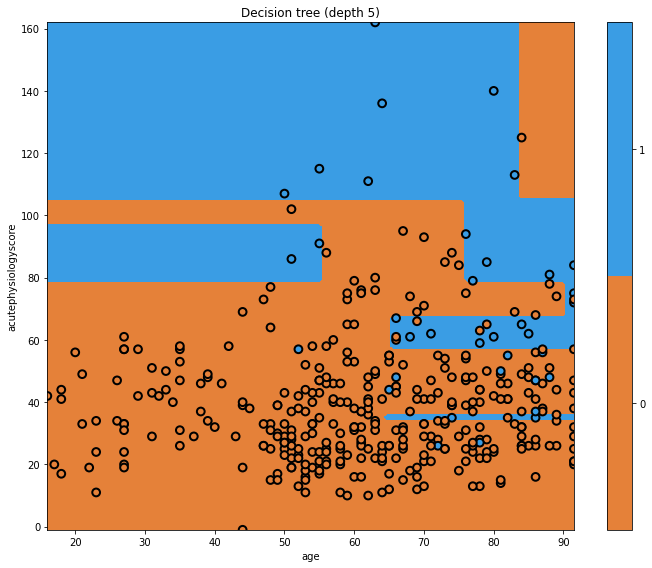

In [107]:
# train model and increase depth to 5x
mdl = tree.DecisionTreeClassifier(max_depth=5)
mdl = mdl.fit(x_train.values, y_train.values)

# plot tree
plt.figure(figsize=[10,8])
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title="Decision tree (depth 5)")

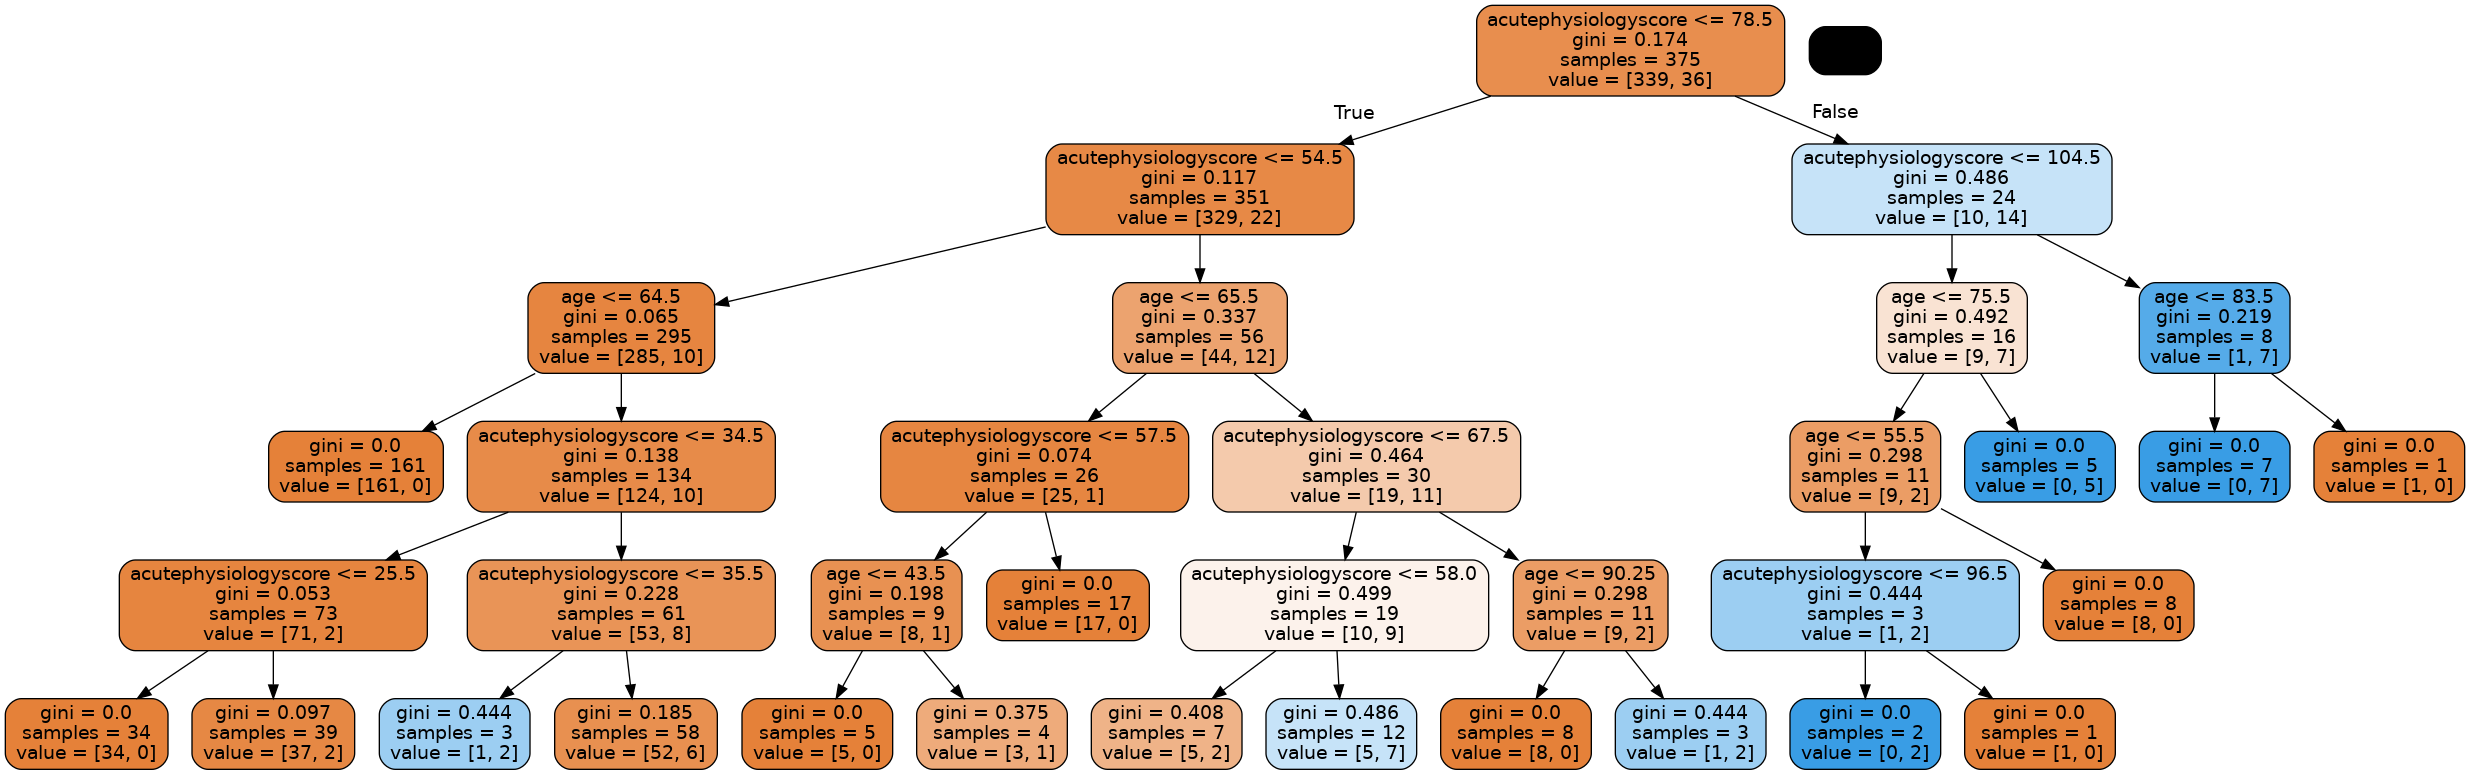

In [108]:
graph = glowyr.create_graph(mdl,feature_names=features)
Image(graph.create_png())
#dark blue for patients that died
#light blue survived
#white box is equally splitted both classes


#Overfitting 
#Consider a patient aged 45 years with an acute physiology score of 100. From the top of the tree, we would work our way down:
#acutePhysiologyScore <= 78.5? No.
#acutePhysiologyScore <= 104.5? Yes.
#age <= 76.5? Yes
#age <= 55.5. Yes.
#acutePhysiologyScore <= 96.5? No.
#
#Answer: Far right, gini impurity of 0

The tree is already pruned at an equal or higher level.


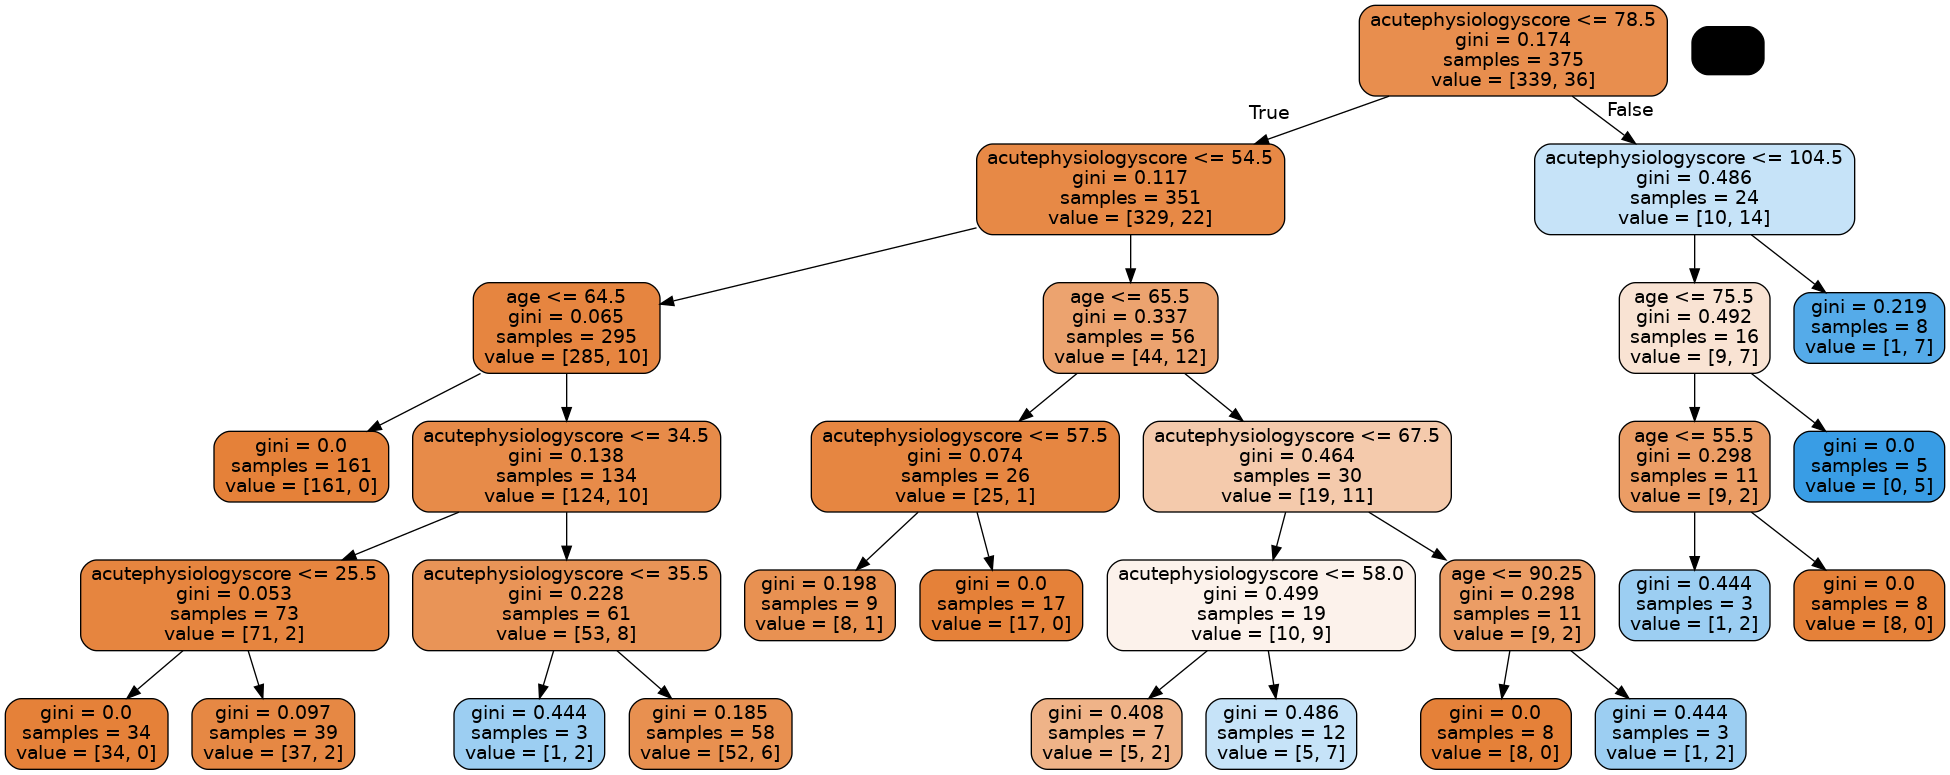

In [113]:
#Prune our model
mdl = glowyr.prune(mdl, min_samples_leaf = 10)#set min of 10 samples in each leaf#if less than 10 samples in the model do not split it#known as hyper parameters
graph = glowyr.create_graph(mdl,feature_names=features)
Image(graph.create_png())

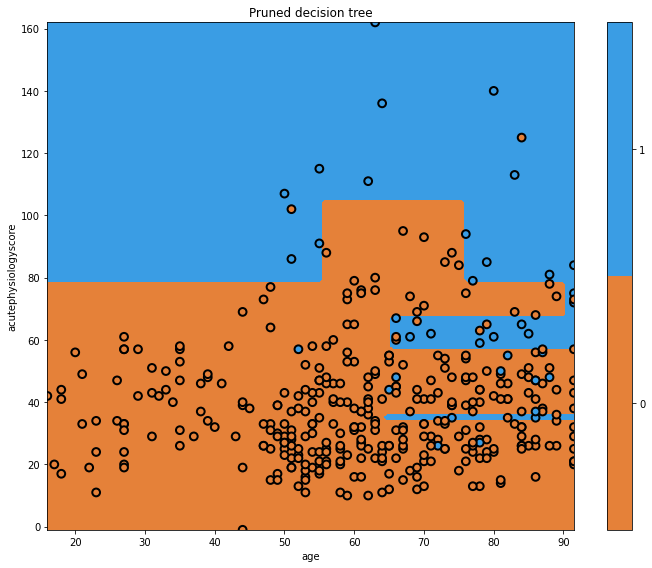

In [114]:
plt.figure(figsize=[10,8])
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title="Pruned decision tree")

 #####################Decision trees have high “variance”################

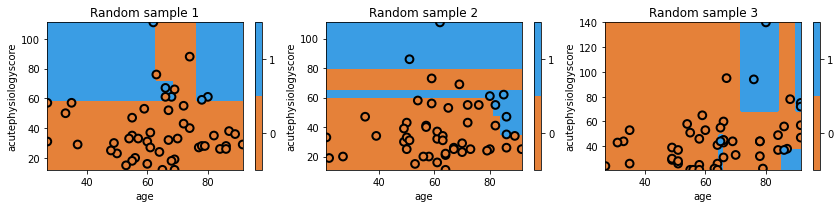

In [120]:
#each you train a model you get a different one

import numpy as np
np.random.seed(123)#change to 1 to get different plot

fig = plt.figure(figsize=[12,3])

for i in range(3):
    ax = fig.add_subplot(1,3,i+1)

    # generate indices in a random order
    idx = np.random.permutation(x_train.shape[0])#resampling data for the 3 models we train 
    
    # only use the first 50 from random permutation of our data
    idx = idx[:50]
    x_temp = x_train.iloc[idx]
    y_temp = y_train.values[idx]
    
    # initialize the model
    mdl = tree.DecisionTreeClassifier(max_depth=5)
    
    # train the model using the dataset
    mdl = mdl.fit(x_temp.values, y_temp)
    txt = f'Random sample {i+1}'
    glowyr.plot_model_pred_2d(mdl, x_temp, y_temp, title=txt)#look at the tree

########Boosting###################

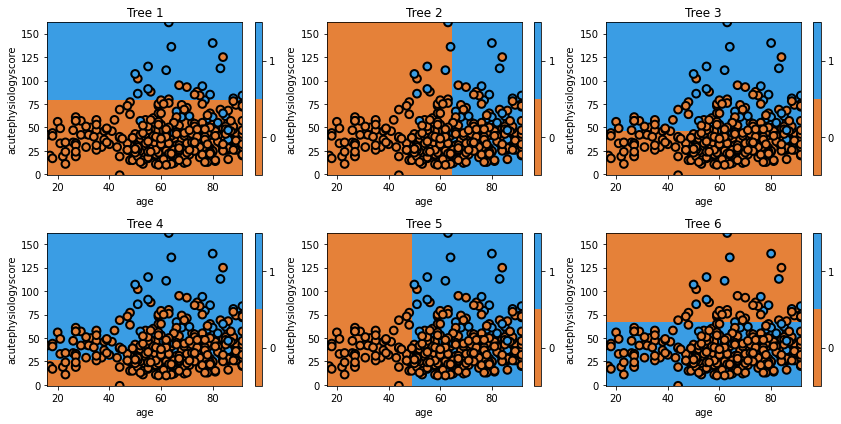

In [124]:
from sklearn import ensemble

# build the model
#clf=classfier
clf = tree.DecisionTreeClassifier(max_depth=1)#weak learner
mdl = ensemble.AdaBoostClassifier(base_estimator=clf,n_estimators=6)#ensemble model (i.e have 6 weak learners) which can combine different decisions
#AdaBoostClassifier combine our base estimator to 6 estimators
mdl = mdl.fit(x_train.values, y_train.values)

# plot each individual decision tree
fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(mdl.estimators_):
    ax = fig.add_subplot(2,3,i+1)
    txt = 'Tree {}'.format(i+1)
    glowyr.plot_model_pred_2d(estimator, x_train, y_train, title=txt)

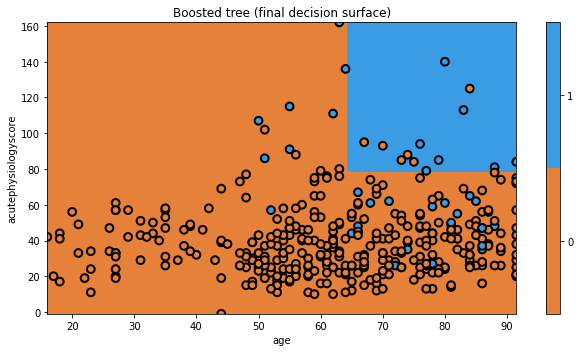

In [128]:
# plot the final prediction
#stronger learner from previous
#iteratively changing the data set to have intrigue observations to increase model capability
#boosting to strong learning
plt.figure(figsize=[9,5])
txt = 'Boosted tree (final decision surface)'
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title=txt)

In [129]:
##############Bagging###############################

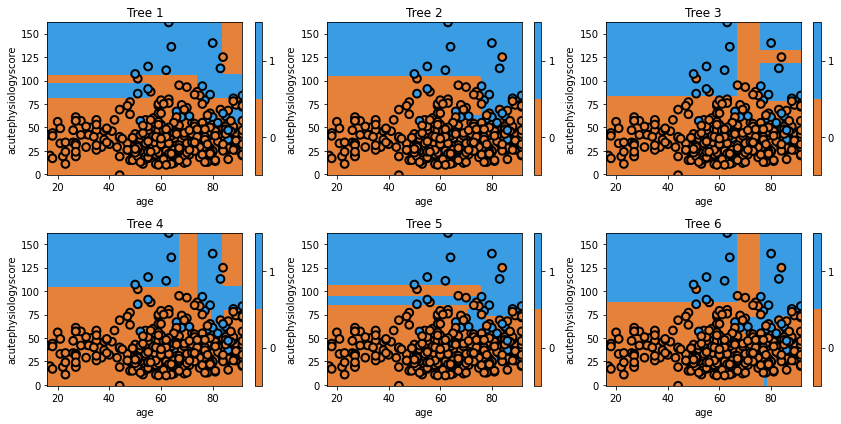

In [138]:
np.random.seed(321)
clf = tree.DecisionTreeClassifier(max_depth=5)
#here one might do pruning
mdl = ensemble.BaggingClassifier(base_estimator=clf, n_estimators=6)
mdl = mdl.fit(x_train.values, y_train.values)
#estimator=model

fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(mdl.estimators_):    
    ax = fig.add_subplot(2,3,i+1)
    txt = 'Tree {}'.format(i+1)
    glowyr.plot_model_pred_2d(estimator, x_train, y_train, title=txt)

In [139]:
#help(ensemble.BaggingClassifier)

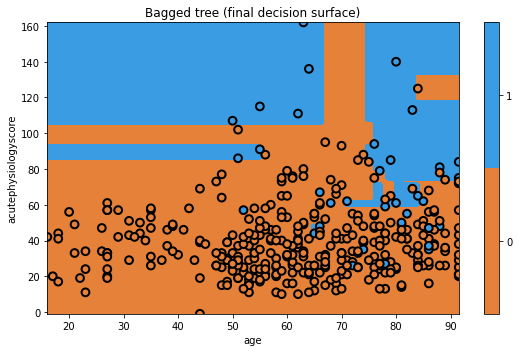

In [141]:
# plot the final prediction
plt.figure(figsize=[8,5])
txt = 'Bagged tree (final decision surface)'
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title=txt)

In [155]:
##################Random Forest in Tree models##############################
#Advantage of sinle decision tree with high variance
#when combine models and aggregate the predictiona and combining the weak learners model
#we forcing the decision with random forest and add more variability which leads to
#improves performance
#empirically known that generate better models with Random Forest than Adam Boost

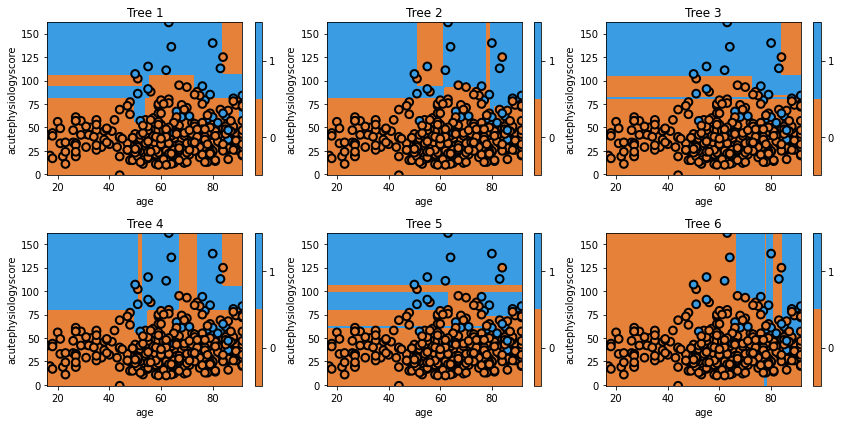

In [181]:
np.random.seed(321)
mdl = ensemble.RandomForestClassifier(max_depth=5, n_estimators=6, max_features=1)#max)features to 1 we have two features age and score but we force
#to use one feature at each individual data point we train
#if depth is set to 1 leads to 2 possible trees, max 1 split on age or acutephysiology score and no sensible split to reduce gini impurity
mdl = mdl.fit(x_train.values, y_train.values)

fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(mdl.estimators_):    
    ax = fig.add_subplot(2,3,i+1)
    txt = 'Tree {}'.format(i+1)
    glowyr.plot_model_pred_2d(estimator, x_train, y_train, title=txt)

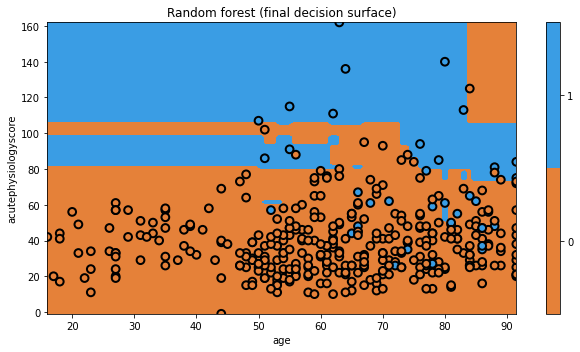

In [182]:
#plot final decision boundary from the trees
plt.figure(figsize=[9,5])
txt = 'Random forest (final decision surface)'
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title=txt)

In [183]:
#Bagging vs Random Forest
#Bagging at every one it makes a decision to minimize the gini score.Changing the underline data that we train on.
#Random Forest at each node rather than splitting variable at random, there are 100 different split but pick the same features and re-sample ten of those
#features and allowed to split on 1 of the 10 features on the node. As well as boosting, it ensures that picks at different data point.
#Boosting-try lots of method
#Train on variance or lots of data
#Random-Forest can be defined with feature selection or as bagging with feature selection
#For Random-Forest is not state-of-the-art now
#Hyperparameters-max depth=sqrt(number of features)-check rules in kaggle competition
#tuning
#https://towardsdatascience.com/hyperparameter-tuning-in-python-21a76794a1f7#:~:text=We%20have%20three%20methods%20of,Random%20search%2C%20and%20Informed%20search.
#ensemble combines a banch of models to make a decision

In [184]:
##############Gradient Boosting model############################################
#AdaBoost=adaptive boosting we train the model and find the point that are wrong and then 
#train again for 2nd model
#Gradient boosting looks at the loss function/gini/cross entropy on how to train the model
#by changing the model to reduce the gini impurity the next time

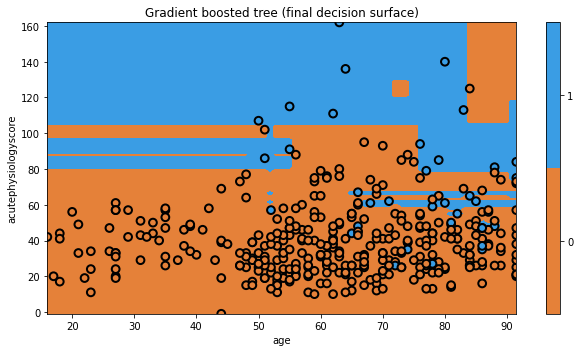

In [185]:
#trains model sequentially 
#the model randomly chooses the features
np.random.seed(321)
#mdl=model
mdl = ensemble.GradientBoostingClassifier(n_estimators=100)
mdl = mdl.fit(x_train.values, y_train.values)

plt.figure(figsize=[9,5])
txt = 'Gradient boosted tree (final decision surface)'
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title=txt)

In [186]:
##########Compare Performance of Trees##################
#Find Optimum

AUROC	Model
0.701	Decision Tree
0.894	Gradient Boosting
0.806	Random Forest
0.779	Bagging
0.878	AdaBoost


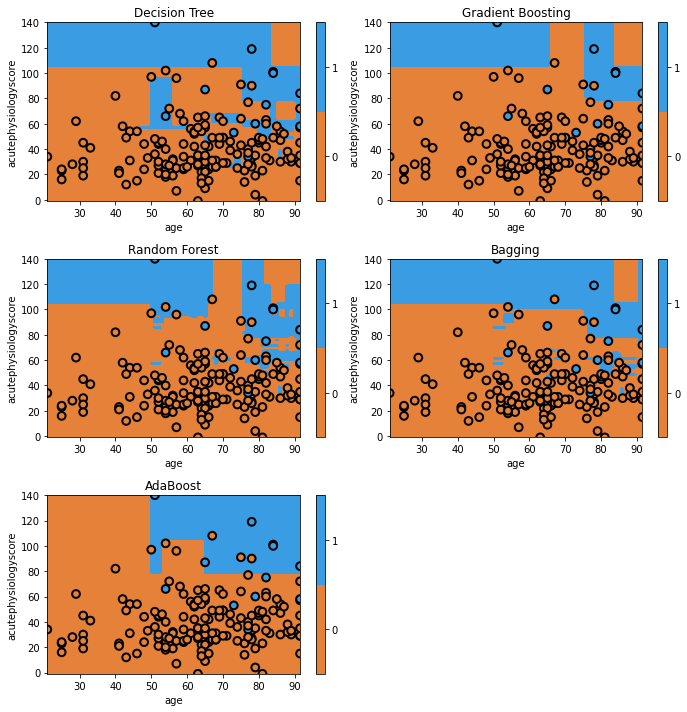

In [199]:
from sklearn import metrics

clf = dict()
clf['Decision Tree'] = tree.DecisionTreeClassifier(criterion='entropy', splitter='best').fit(x_train.values, y_train.values)
clf['Gradient Boosting'] = ensemble.GradientBoostingClassifier(n_estimators=10).fit(x_train.values, y_train.values)
clf['Random Forest'] = ensemble.RandomForestClassifier(n_estimators=10).fit(x_train.values, y_train.values)
clf['Bagging'] =  ensemble.BaggingClassifier(n_estimators=10).fit(x_train.values, y_train.values)
clf['AdaBoost'] =  ensemble.AdaBoostClassifier(n_estimators=10).fit(x_train.values, y_train.values)

fig = plt.figure(figsize=[10,10])

print('AUROC\tModel')
for i, curr_mdl in enumerate(clf):    
    yhat = clf[curr_mdl].predict_proba(x_test.values)[:,1]
    score = metrics.roc_auc_score(y_test, yhat)
    print('{:0.3f}\t{}'.format(score, curr_mdl))
    ax = fig.add_subplot(3,2,i+1)
    glowyr. plot_model_pred_2d(clf[curr_mdl], x_test, y_test, title=curr_mdl)
#each time we run then or use boosttrapping they change/might become better and get 95% confidence intervals

In [200]:
#Gradient Boosting performs best with highest AUROC but prone to overfitting

In [201]:
#Bagging is overfit

In [202]:
#AUROC >0.5 are good models